#### Fake News Classifier Using LSTM

##### Import Libraries:

In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import pad_sequences
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords

##### Loading Data:

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


##### Data Understanding:

In [3]:
df.shape

(20800, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
# Drop the missing values
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
# Get the Independent and dependent Features
X = df.drop('label', axis=1)
y = df['label']

In [10]:
X.shape, y.shape

((18285, 4), (18285,))

In [16]:
# Vocabulary size
vocab_size = 5000

##### Data Preprocessing:

In [17]:
messages = X.copy()
messages.reset_index(inplace=True)

In [20]:
# Data Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    # remove all the special characters except a-z and A-Z
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    # Stemming and removing stopwords
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

##### OneHot Representation:

In [21]:
onehot_representation = [one_hot(words,vocab_size) for words in corpus]

##### Padding Sequence:

In [22]:
# Pad Sequences to make all the sentences of same length
max_length = 20
pad_sequences_representation = pad_sequences(onehot_representation, padding = 'pre', maxlen=max_length)
print(pad_sequences_representation)

[[   0    0    0 ... 1178  934 4724]
 [   0    0    0 ... 3987 1475 3410]
 [   0    0    0 ... 4450 2635 3013]
 ...
 [   0    0    0 ... 4239 4165 4693]
 [   0    0    0 ... 2051   66 4828]
 [   0    0    0 ... 4733 4285 3710]]


##### Model Building:

In [23]:
embedding_features = 40
model = Sequential()
model.add(Embedding(vocab_size, embedding_features, input_length=max_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_final = np.array(pad_sequences_representation)
y_final = np.array(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

##### Model Training:

In [28]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
200/200 [==============================] - 15s 50ms/step - loss: 0.3269 - accuracy: 0.8499 - val_loss: 0.1994 - val_accuracy: 0.9162
Epoch 2/10
200/200 [==============================] - 10s 48ms/step - loss: 0.1355 - accuracy: 0.9477 - val_loss: 0.1970 - val_accuracy: 0.9180
Epoch 3/10
200/200 [==============================] - 11s 55ms/step - loss: 0.0997 - accuracy: 0.9655 - val_loss: 0.2177 - val_accuracy: 0.9202
Epoch 4/10
200/200 [==============================] - 13s 65ms/step - loss: 0.0730 - accuracy: 0.9759 - val_loss: 0.2489 - val_accuracy: 0.9182
Epoch 5/10
200/200 [==============================] - 15s 73ms/step - loss: 0.0508 - accuracy: 0.9824 - val_loss: 0.2715 - val_accuracy: 0.9160
Epoch 6/10
200/200 [==============================] - 16s 81ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.3113 - val_accuracy: 0.9112
Epoch 7/10
200/200 [==============================] - 16s 82ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.3865 - val_accuracy:

##### Performance Metrics and Accuracy:

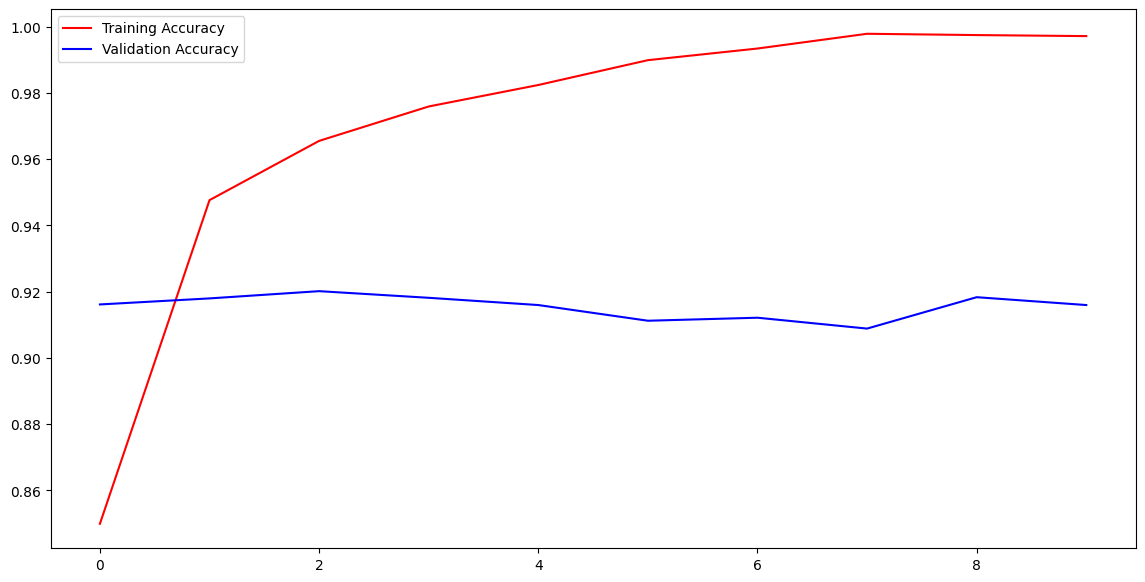

In [35]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

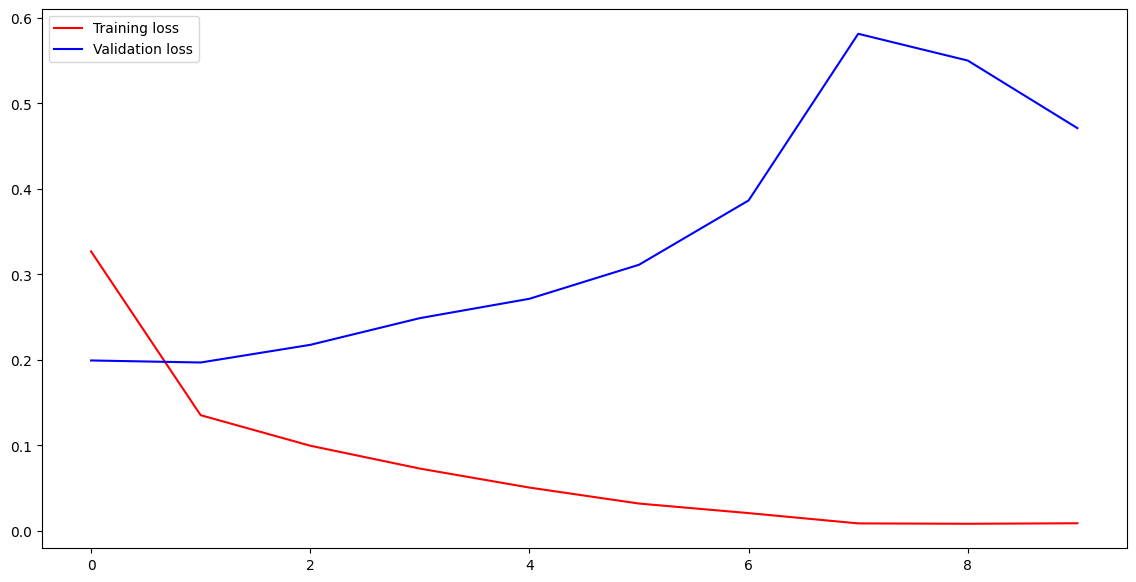

In [36]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [30]:
y_pred = model.predict(X_test)

172/172 [==============================] - 3s 8ms/step


In [32]:
cm = confusion_matrix(y_test, y_pred.round())
cm

array([[2833,  274],
       [ 187, 2192]], dtype=int64)

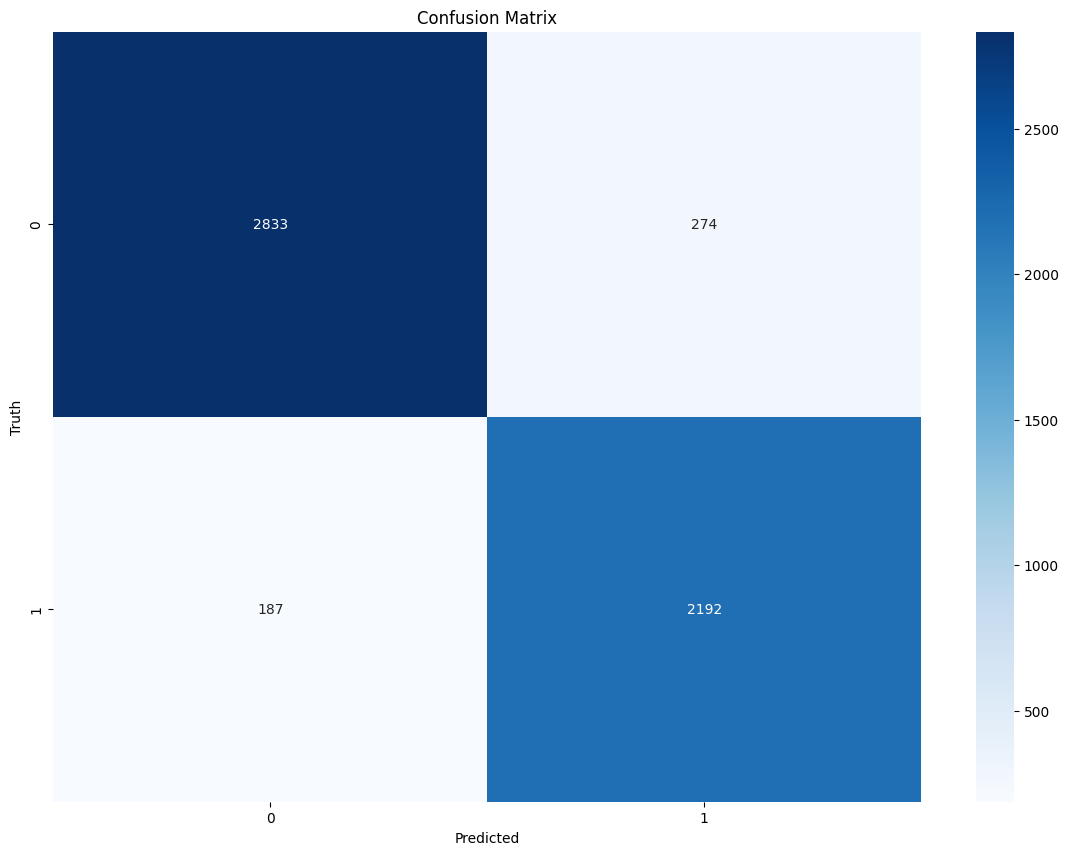

In [39]:
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [38]:
print(accuracy_score(y_test, y_pred.round()))

0.9159679183375866


In [37]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3107
           1       0.89      0.92      0.90      2379

    accuracy                           0.92      5486
   macro avg       0.91      0.92      0.91      5486
weighted avg       0.92      0.92      0.92      5486

